Reading CSV files from online resources:


In [48]:
import numpy as np
import pandas as pd
from pandas import read_csv

url = "https://raw.githubusercontent.com/ritvikmath/YouTubeVideoCode/main/fish.csv"
dataframe  =read_csv(url)
data = dataframe.values
data = pd.DataFrame(data)
data.columns = ['length', 'weight','type']
data.dtypes
data['length'] = pd.to_numeric(data['length'])
data['weight'] = pd.to_numeric(data['weight'])
data = data.astype({"type": str})
df = data.copy()
df.dtypes


length    float64
weight    float64
type       object
dtype: object

In [49]:
df['type'] = df['type'].apply(lambda x: 1 if x == 'tuna' else 0)
df

,length,weight,type
0,8.618381,7.848030,1
1,2.522046,8.762507,1
2,2.035690,7.101971,1
3,6.695008,4.953932,0
4,9.834069,7.908453,1
...,...,...,...
995,3.710186,0.956612,0
996,3.749596,9.557450,0
997,2.410087,3.355781,1
998,0.990773,3.812210,1


[Text(166.53774126838238, 214.6523076923077, 'X[0] <= 3.989\ngini = 0.477\nsamples = 1000\nvalue = [392, 608]'),
 Text(96.29731158088236, 209.07692307692307, 'X[0] <= 0.049\ngini = 0.412\nsamples = 431\nvalue = [306, 125]'),
 Text(93.0149586397059, 203.50153846153847, 'X[0] <= 0.015\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(91.37378216911766, 197.92615384615385, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(94.65613511029413, 197.92615384615385, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(99.57966452205883, 203.50153846153847, 'X[0] <= 3.965\ngini = 0.41\nsamples = 428\nvalue = [305, 123]'),
 Text(97.9384880514706, 197.92615384615385, 'X[0] <= 3.952\ngini = 0.412\nsamples = 423\nvalue = [300, 123]'),
 Text(96.29731158088236, 192.35076923076923, 'X[0] <= 0.136\ngini = 0.411\nsamples = 422\nvalue = [300, 122]'),
 Text(78.13538602941178, 186.7753846153846, 'X[0] <= 0.076\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(76.49420955882354, 181.2, 'X[0] <= 0.066\ngini 

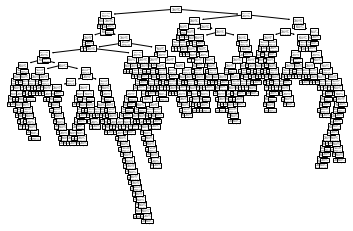

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
clf = tree.DecisionTreeClassifier()
x = data.iloc[:, 1:2]
y =data.iloc[: , -1]
x_train, x_test,y_train, y_test = train_test_split(x, y,train_size=0.7, test_size=0.3, random_state=100)
clf =clf.fit(x,y)
tree.plot_tree(clf)

Saving the decision tree in pdf format

In [65]:
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("fish") 

'fish.pdf'

Hyperparameter and grid search

In [80]:
from sklearn.model_selection import GridSearchCV
features = ['length','weight']
hyper_params = { 
    'criterion': ['gini', 'entropy'] }

model_cv = GridSearchCV(estimator = clf, param_grid = hyper_params, scoring='accuracy',cv=5,verbose = 1,n_jobs=-1)  
model_cv.fit(x_train, y_train)
best_parameters = model_cv.best_params_
print(best_parameters)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'criterion': 'gini'}
